# 使用範例
使用 keras-Like_NN 套件來近似 sine function。

## 導入相關套件及 My_Keras_Like 的內容

In [1]:
%pylab inline
from mydl import Dense, Sequential, Dropout, SquareError, Activation
from mydl_operator import Sine, Cosine
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## 造 sine function 的數據

In [2]:
xlst = np.linspace(np.pi, 2*np.pi, 20)
ylst = np.sin(xlst)

## 建模型的方式模仿 Keras

In [136]:
N = 3

model = Sequential()
model.add(Dense(N, 1))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(N, N))
model.add(Activation('sigmoid'))
model.add(Dense(1, N))
model.compile(SquareError())

## 訓練的方式稍微不一樣，前兩個變數可以自由餵入 batch，第三個變數為 learning rate

In [138]:
for _ in xrange(10):
        model.fit(xlst, ylst, .1)

Loss: [[ 0.02974333]] in 20 samples.
Loss: [[ 0.02972531]] in 20 samples.
Loss: [[ 0.0297147]] in 20 samples.
Loss: [[ 0.02970977]] in 20 samples.
Loss: [[ 0.02970788]] in 20 samples.
Loss: [[ 0.0297072]] in 20 samples.
Loss: [[ 0.02970682]] in 20 samples.
Loss: [[ 0.02970644]] in 20 samples.
Loss: [[ 0.02970601]] in 20 samples.
Loss: [[ 0.02970554]] in 20 samples.


一開始 learning rate 大一點比較好，但不要大到 divergence 的情形。

In [139]:
for _ in xrange(1000):
    for __ in xrange(len(ylst)):
        model.fit_single(xlst[__], ylst[__], .001)
    
for _ in xrange(200):
        model.fit(xlst, ylst, .001)

loss: [[ 0.05233386]]
loss: [[ 0.00397161]]
loss: [[ 0.00965]]
loss: [[ 0.06166883]]
loss: [[ 0.1485692]]
loss: [[ 0.25584059]]
loss: [[ 0.36735469]]
loss: [[ 0.46724446]]
loss: [[ 0.54173631]]
loss: [[ 0.58073361]]
loss: [[ 0.57897726]]
loss: [[ 0.53665535]]
loss: [[ 0.45939466]]
loss: [[ 0.35763412]]
loss: [[ 0.24544853]]
loss: [[ 0.13895077]]
loss: [[ 0.05444747]]
loss: [[ 0.00655057]]
loss: [[ 0.00645227]]
loss: [[ 0.05942083]]
loss: [[ 0.05885844]]
loss: [[ 0.00590702]]
loss: [[ 0.0071239]]
loss: [[ 0.05498823]]
loss: [[ 0.13809038]]
loss: [[ 0.24202467]]
loss: [[ 0.35075515]]
loss: [[ 0.44849209]]
loss: [[ 0.52152204]]
loss: [[ 0.55978976]]
loss: [[ 0.55805752]]
loss: [[ 0.5165143]]
loss: [[ 0.44076713]]
loss: [[ 0.34121517]]
loss: [[ 0.23187442]]
loss: [[ 0.12878155]]
loss: [[ 0.0481517]]
loss: [[ 0.0044924]]
loss: [[ 0.00888147]]
loss: [[ 0.06639592]]
loss: [[ 0.06579863]]
loss: [[ 0.00823677]]
loss: [[ 0.00497151]]
loss: [[ 0.04866266]]
loss: [[ 0.12794949]]
loss: [[ 0.2285316

## 看看訓練的結果，恩...很爛，sine不是這麼好訓練的樣子。

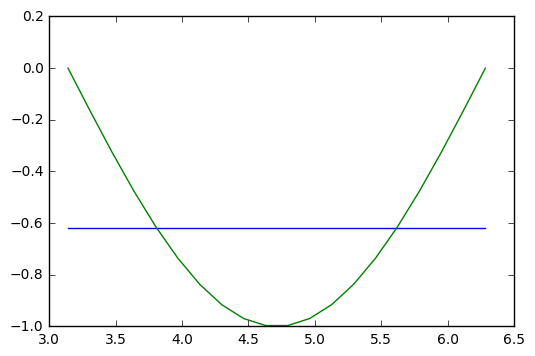

In [119]:
y = np.zeros(ylst.shape)
for i, x in enumerate(xlst):
    y[i] = model.evaluate_single(x)
    
plot(xlst, y)
plot(xlst, ylst)

In [11]:
model.evaluate_single(2)

array([[-0.36845111]])

In [14]:
n0 = model.nodes[0]
np.sin(n0.forward(n0.prev_in))

array([[-0.36845111]])

In [28]:
model.nodes[0].bias

array([[-0.1040885]])

In [29]:
6.28318531 * 0.10255398 + 0.1040885

0.7484541606180339

In [44]:
stepsize = .01
W = -0.1086948
dW = -6.15409617

bias = -0.13114487
dbias = -0.97945483

W -= (stepsize/np.linalg.norm(dW)) * dW
bias -= (stepsize/np.linalg.norm(dbias)) * dbias

In [123]:
np.random.rand() * 0.1

0.032090153709500635

In [45]:
bias

-0.12114487